In [33]:
using Plots, JLD, OffsetArrays, LinearAlgebra, ConfParser, ProgressMeter, Colors, Statistics,
    EllipsisNotation
import OffsetArrays: no_offset_view

In [4]:
function generateConfig(params)
    k, uf, fs_radius, λ₁, λ₂, λ₃ = params
    open("measurements/trial_1/$k.conf", "w") do f
        write(f, """
N                     500
undersampling_rate    $uf
fully_sampled_radius  $fs_radius
lambda_1              $λ₁
lambda_2              $λ₂
lambda_3              $λ₃
verbose               true
        """)
    end
end

generateConfig (generic function with 1 method)

In [2]:
log_range = [0, (10. .^ collect(-5:0))...]
grid = [(uf, 0.1, λ₁, λ₂, λ₃) for uf in 0.2:0.2:0.9, λ₁ in log_range, λ₂ in log_range,
        λ₃ in [0, (10. .^ collect(-2:0))...]]
grid = enumerate(vec(grid))
grid = [(i, p...) for (i,p) in grid];

In [4]:
generateConfig.(grid);

In [5]:
@load "data.jld"

2-element Array{Symbol,1}:
 :image4D
 :kSpace

In [6]:
image3D = sum(image4D, dims = 4)
image3D_norm = norm(image3D)
mse_temp = similar(image3D)
mse(img) = norm(sum!(mse_temp, img) .-= image3D) / image3D_norm

mse (generic function with 1 method)

In [26]:
function imshow(img::Array{T, 2}; shift = false) where T<:Number
    plot(Gray.(abs.(img)'), seriestype=:image)
end

imshow (generic function with 1 method)

In [27]:
p = Progress(length(grid), 1)
NMSE_vec, f_vec = [[Dict() for _ in 1:4] for _ in 1:2]
foreach(readdir("measurements/trial_1/")) do f
    if endswith(f, ".jld")
        conf_filename = "measurements/trial_1/" * split(f, ".")[1] * ".conf"
        conf = ConfParse(conf_filename)
        parse_conf!(conf)
        undersampling_rate = parse(Float64, retrieve(conf, "undersampling_rate"))
        uf = round(Int, undersampling_rate * 5)
        λ₁ = parse(Float64, retrieve(conf, "lambda_1"))
        λ₂ = parse(Float64, retrieve(conf, "lambda_2"))
        λ₃ = parse(Float64, retrieve(conf, "lambda_3"))
        d = load("measurements/trial_1/"*f)
        NMSE_vec[uf]["$(split(f, ".")[1]) | λ₁: $λ₁, λ₂: $λ₂, λ₃: $λ₃"] = d["NMSE_vec_pogm"]
        f_vec[uf]["$(split(f, ".")[1]) | λ₁: $λ₁, λ₂: $λ₂, λ₃: $λ₃"] = d["f_vec_pogm"]
        #images[uf]["$(split(f, ".")[1]) | λ₁: $λ₁, λ₂: $λ₂, λ₃: $λ₃"] = d["image4D_pogm"]
        next!(p)
    end
end
finish!(p)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:42


best_label_2 = "425 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.1"


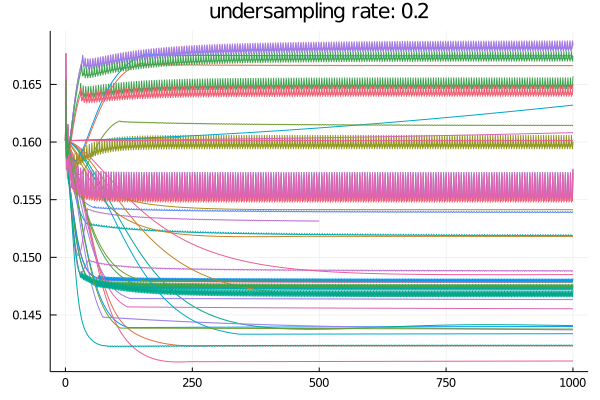

In [63]:
plt = plot(title = "undersampling rate: 0.2", legend = false)
best_label_2, best_value = "", Inf
for (label, series) in NMSE_vec[1]
    series[series .< eps(Float64)] .= NaN
    if series[end] < best_value
        best_label_2 = label
        best_value = series[end]
    end
    any(x -> x > 0.17, series) || plot!(series, label=label)
end
@show best_label_2
plt

best_label_4 = "230 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.01"


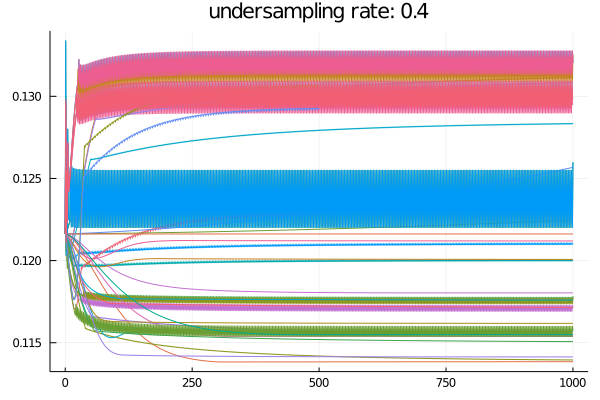

In [64]:
plt = plot(title = "undersampling rate: 0.4", legend = false)
best_label_4, best_value = "", Inf
for (label, series) in NMSE_vec[2]
    series[series .< eps(Float64)] .= NaN
    if series[end] < best_value
        best_label_4 = label
        best_value = series[end]
    end
    any(x -> x > 0.135, series) || plot!(series, label=label)
end
@show best_label_4
plt

best_label_6 = "459 | λ₁: 0.0001, λ₂: 0.0001, λ₃: 0.1"


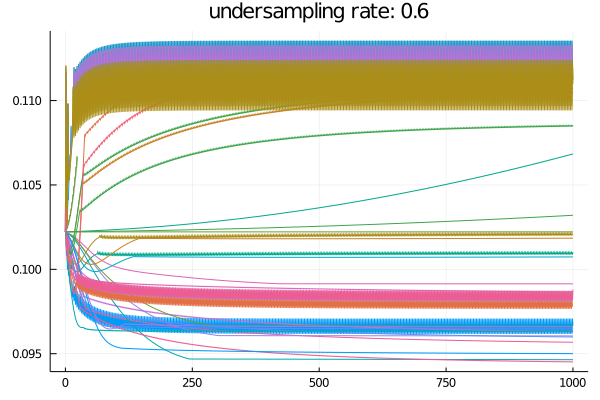

In [65]:
plt = plot(title = "undersampling rate: 0.6", legend = false)
best_label_6, best_value = "", Inf
for (label, series) in NMSE_vec[3]
    series[series .< eps(Float64)] .= NaN
    if series[end] < best_value
        best_label_6 = label
        best_value = series[end]
    end
    any(x -> x > 0.115, series) || plot!(series, label=label)
end
@show best_label_6
plt

best_label_8 = "428 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.1"


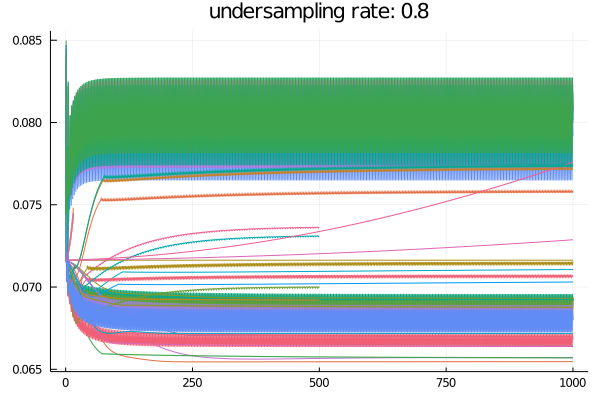

In [66]:
plt = plot(title = "undersampling rate: 0.8", legend = false)
best_label_8, best_value = "", Inf
for (label, series) in NMSE_vec[4]
    series[series .< eps(Float64)] .= NaN
    if series[end] < best_value
        best_label_8 = label
        best_value = series[end]
    end
    any(x -> x > 0.09, series) || plot!(series, label=label)
end
@show best_label_8
plt

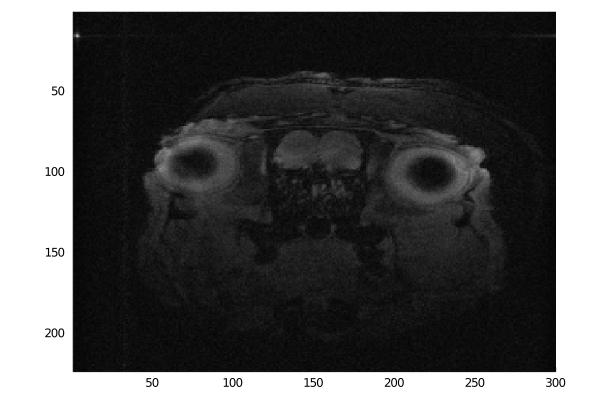

In [67]:
imshow(mean(image4D, dims = 4)[..,1,1])

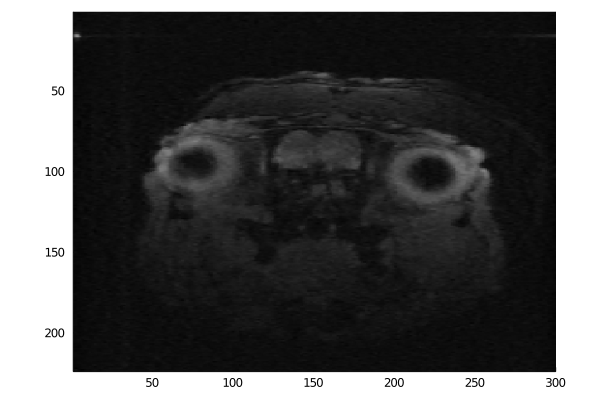

In [68]:
d = load("measurements/trial_1/" * split(best_label_2, " ")[1] * ".jld")
imshow(mean(d["image4D_pogm"], dims = 4)[..,1,1])

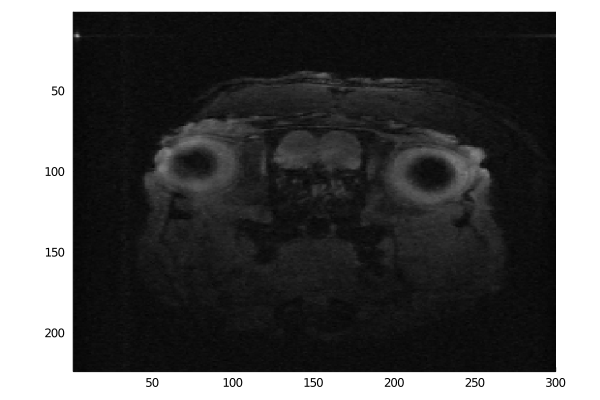

In [69]:
d = load("measurements/trial_1/" * split(best_label_4, " ")[1] * ".jld")
imshow(mean(d["image4D_pogm"], dims = 4)[..,1,1])

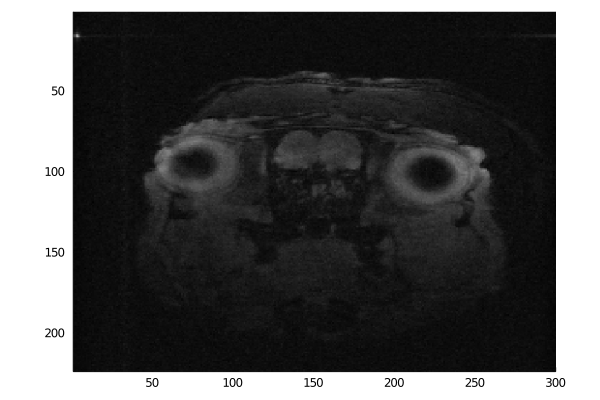

In [70]:
d = load("measurements/trial_1/" * split(best_label_6, " ")[1] * ".jld")
imshow(mean(d["image4D_pogm"], dims = 4)[..,1,1])

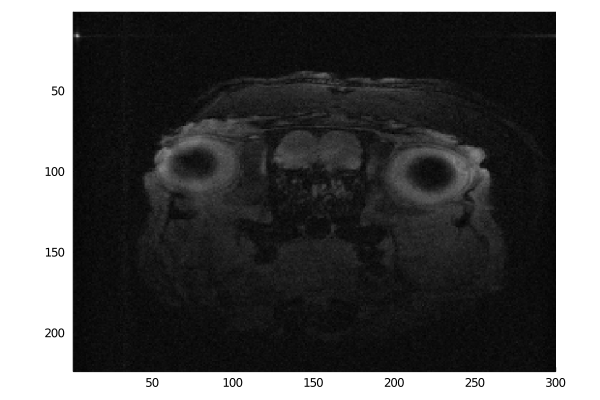

In [71]:
d = load("measurements/trial_1/" * split(best_label_8, " ")[1] * ".jld")
imshow(mean(d["image4D_pogm"], dims = 4)[..,1,1])

In [45]:
sum(length, NMSE_vec)

548

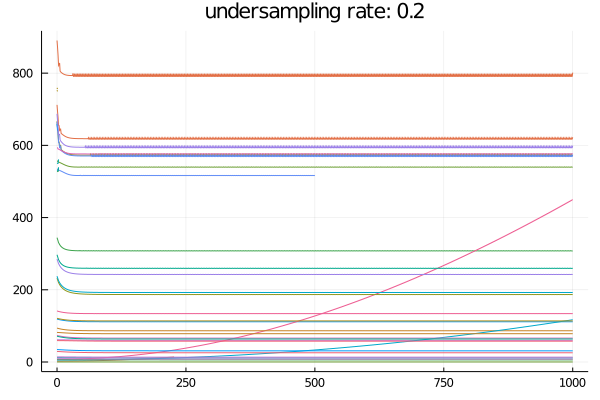

In [72]:
plt = plot(title = "undersampling rate: 0.2", legend = false)
for (label, series) in f_vec[1]
    series[series .< eps(Float64)] .= NaN
    any(x -> x > 1000, series) || plot!(series, label=label)
end
plt

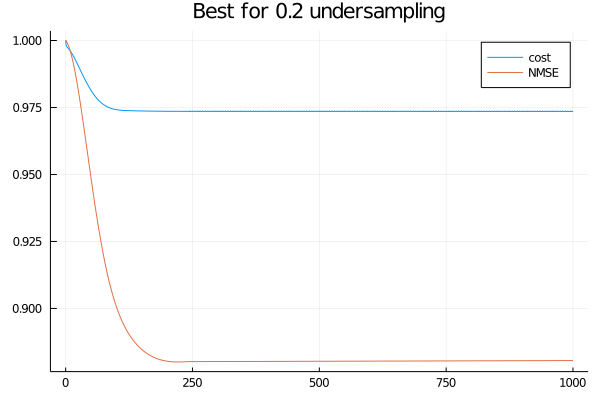

In [77]:
plot(f_vec[1][best_label_2] ./ maximum(f_vec[1][best_label_2]),
    title = "Best for 0.2 undersampling", label = "cost")
plot!(NMSE_vec[1][best_label_2] ./ maximum(NMSE_vec[1][best_label_2]), label = "NMSE")

In [88]:
f_vec[1][best_label_2][250], f_vec[1][best_label_2][500],  f_vec[1][best_label_2][1000]

(60.043717658267525, 60.043051082755994, 60.04536541039632)

In [87]:
NMSE_vec[1][best_label_2][250], NMSE_vec[1][best_label_2][500],  NMSE_vec[1][best_label_2][1000]

(0.14094168265448395, 0.1409596730914445, 0.14100162943516786)

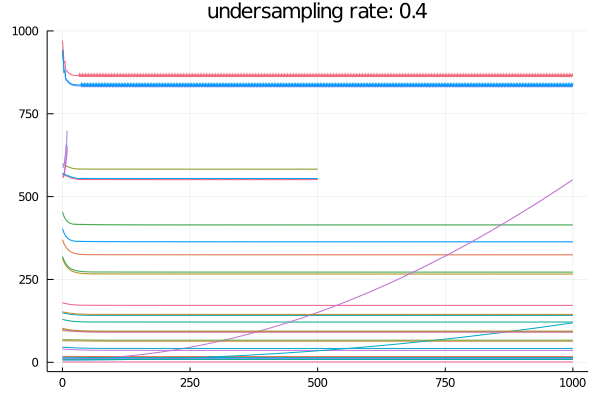

In [78]:
plt = plot(title = "undersampling rate: 0.4", legend = false)
for (label, series) in f_vec[2]
    series[series .< eps(Float64)] .= NaN
    any(x -> x > 1000, series) || plot!(series, label=label)
end
plt

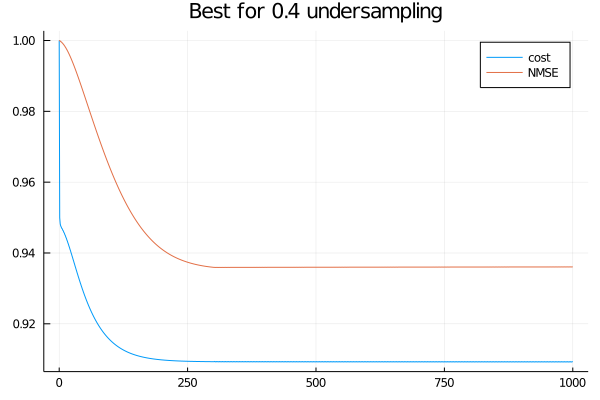

In [81]:
plot(f_vec[2][best_label_4] ./ maximum(f_vec[2][best_label_4]),
    title = "Best for 0.4 undersampling", label = "cost")
plot!(NMSE_vec[2][best_label_4] ./ maximum(NMSE_vec[2][best_label_4]), label = "NMSE")

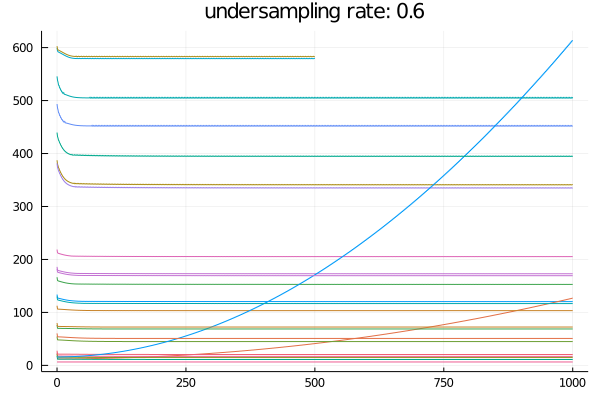

In [82]:
plt = plot(title = "undersampling rate: 0.6", legend = false)
for (label, series) in f_vec[3]
    series[series .< eps(Float64)] .= NaN
    any(x -> x > 1000, series) || plot!(series, label=label)
end
plt

In [83]:
plot(f_vec[3][best_label_6] ./ maximum(f_vec[3][best_label_6]),
    title = "Best for 0.6 undersampling", label = "cost")
plot!(NMSE_vec[3][best_label_6] ./ maximum(NMSE_vec[3][best_label_6]), label = "NMSE")

In [92]:
best_label_2, best_label_4, best_label_6, best_label_8

("425 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.1", "230 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.01", "459 | λ₁: 0.0001, λ₂: 0.0001, λ₃: 0.1", "428 | λ₁: 1.0e-5, λ₂: 1.0e-5, λ₃: 0.1")

In [114]:
trend(x) = begin
    mean(x[1:10]) - mean(x[10:20])
end

trend (generic function with 1 method)

In [119]:
trend_4 = [trend(NMSE_vec[2][best_label_4][i-20:i]) for i in 21:1000] ./ maximum(NMSE_vec[2][best_label_4])
trend_6 = [trend(NMSE_vec[3][best_label_6][i-20:i]) for i in 21:1000] ./ maximum(NMSE_vec[3][best_label_6])
plot(abs.(trend_4), label="0.4", yaxis=:log)
plot!(abs.(trend_6), label="0.6", yaxis=:log)

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [116]:
minimum(abs, trend_4), minimum(abs, trend_6)

(5.464772446056118e-8, 2.3634874717502153e-5)

In [117]:
argmin(abs.(trend_4)), argmin(abs.(trend_6))

(303, 978)

In [100]:
prev = mean(f_vec[2][best_label_4][350:360])
current = mean(f_vec[2][best_label_4][360:370])
println((prev - current) ./ maximum(f_vec[2][best_label_4]))

2.3113387308094313e-6


In [84]:
plt = plot(title = "undersampling rate: 0.8", legend = false)
for (label, series) in f_vec[4]
    series[series .< eps(Float64)] .= NaN
    any(x -> x > 1000, series) || plot!(series, label=label)
end
plt

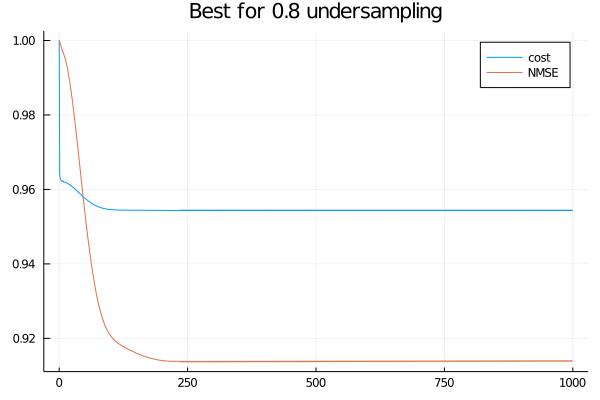

In [85]:
plot(f_vec[4][best_label_8] ./ maximum(f_vec[4][best_label_8]),
    title = "Best for 0.8 undersampling", label = "cost")
plot!(NMSE_vec[4][best_label_8] ./ maximum(NMSE_vec[4][best_label_8]), label = "NMSE")